In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Flatten,\
Reshape, LeakyReLU as LR,\
Activation, Dropout
from tensorflow.keras.models import Model, Sequential
from matplotlib import pyplot as plt
from IPython import display # If using IPython, Colab or Jupyter
import numpy as np

In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Flatten, Activation
from tensorflow.keras.models import Model, Sequential

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
InputModel = Input(shape=(28,28))
EncodedLayer = Dense(32, activation='relu')(InputModel)
DecodedLayer = Dense(28, activation='sigmoid')(EncodedLayer)
AutoencoderModel = Model(InputModel, DecodedLayer)
# we can summarize our model.
AutoencoderModel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 dense (Dense)               (None, 28, 32)            928       
                                                                 
 dense_1 (Dense)             (None, 28, 28)            924       
                                                                 
Total params: 1,852
Trainable params: 1,852
Non-trainable params: 0
_________________________________________________________________


In [4]:
AutoencoderModel.compile(optimizer='adadelta', loss='binary_crossentropy')

In [5]:
history = AutoencoderModel.fit(x_train, x_train,

batch_size=256,
epochs=100,
shuffle=True,
validation_data=(x_test, x_test))

# Make prediction to decode the digits
DecodedDigits = AutoencoderModel.predict(x_test)

Epoch 1/100
235/235 [==============================] - 4s 12ms/step - loss: 0.7115 - val_loss: 0.7115
Epoch 2/100
235/235 [==============================] - 2s 8ms/step - loss: 0.7106 - val_loss: 0.7105
Epoch 3/100
235/235 [==============================] - 2s 9ms/step - loss: 0.7096 - val_loss: 0.7095
Epoch 4/100
235/235 [==============================] - 2s 8ms/step - loss: 0.7085 - val_loss: 0.7083
Epoch 5/100
235/235 [==============================] - 2s 8ms/step - loss: 0.7074 - val_loss: 0.7071
Epoch 6/100
235/235 [==============================] - 2s 8ms/step - loss: 0.7062 - val_loss: 0.7059
Epoch 7/100
235/235 [==============================] - 3s 12ms/step - loss: 0.7049 - val_loss: 0.7046
Epoch 8/100
235/235 [==============================] - 2s 8ms/step - loss: 0.7037 - val_loss: 0.7033
Epoch 9/100
235/235 [==============================] - 2s 8ms/step - loss: 0.7024 - val_loss: 0.7020
Epoch 10/100
235/235 [==============================] - 2s 8ms/step - loss: 0.7010 - val_

In [6]:
DecodedDigits = AutoencoderModel.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [8]:
def plotmodelhistory(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Autoencoder Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

dict_keys(['loss', 'val_loss'])


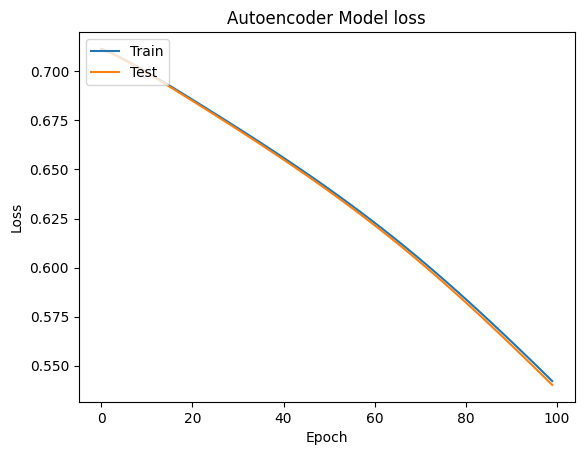

In [10]:
# list all data in history
print(history.history.keys())
# visualization of the loss minimization during the training process
plotmodelhistory(history)

In [11]:
# Acquire MNIST data
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [12]:
# Reshape data for an MLP input
import numpy as np
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))

In [13]:
# Normalize data
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
print(train_images[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [14]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense

In [15]:
input_dim = 28*28
latent_vec_dim = 16
input_layer = Input(shape=(input_dim,))

In [16]:
# Define the autoencoder architecture
# First build the encoder
enc_layer_1 = Dense(latent_vec_dim, activation='tanh')(input_layer)
encoder = enc_layer_1
# Then build the decoder
dec_layer_1 = Dense(input_dim, activation='sigmoid')(encoder)
decoder = dec_layer_1
# Connect both encoder and decoder
autoencoder = Model(input_layer, decoder)
# Latent representation (Optional)
latent_model = Model(input_layer, encoder)
# Get summary
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 16)                12560     
                                                                 
 dense_3 (Dense)             (None, 784)               13328     
                                                                 
Total params: 25,888
Trainable params: 25,888
Non-trainable params: 0
_________________________________________________________________


In [17]:
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

In [18]:
history = autoencoder.fit(train_images, train_images, epochs=70,
validation_data=(test_images, test_images))

Epoch 1/70
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2832 - val_loss: 0.2634
Epoch 2/70
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2633 - val_loss: 0.2628
Epoch 3/70
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2596 - val_loss: 0.2444
Epoch 4/70
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2378 - val_loss: 0.2337
Epoch 5/70
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2210 - val_loss: 0.2102
Epoch 6/70
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2046 - val_loss: 0.1957
Epoch 7/70
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1935 - val_loss: 0.1880
Epoch 8/70
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1860 - val_loss: 0.1829
Epoch 9/70
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1830 - val_loss: 0.1811
Epoch 10/70
1875/1875 [==============================] - 4s 2ms/step - loss: 0.181

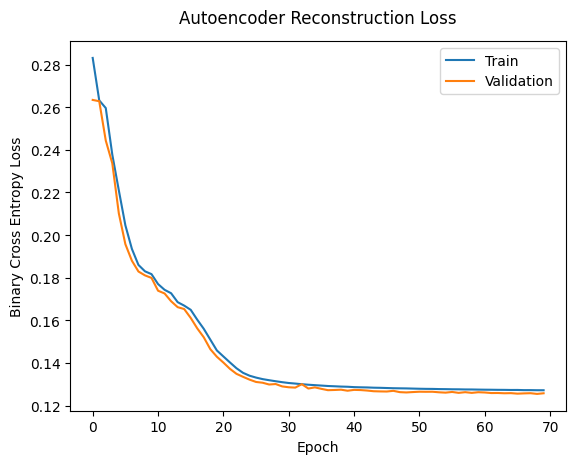

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

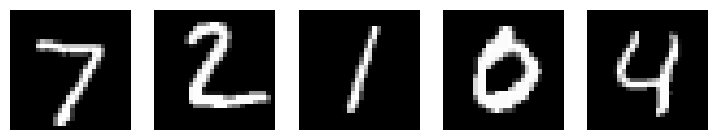

In [21]:
n = 5
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')
plt.show()

313/313 [==============================] - 0s 1ms/step


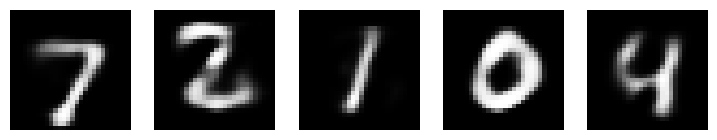

In [22]:
# Testing the model by reconstructing
reconstructed_images = autoencoder.predict(test_images)

n = 5
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(reconstructed_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')
plt.show()

DEEP ARCHITECTURE

In [23]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
input_dim = 28*28
latent_vec_dim = 16
input_layer = Input(shape=(input_dim,))

In [24]:
# Define the autoencoder architecture
# First build the encoder
enc_layer_1 = Dense(500, activation='sigmoid')(input_layer)
enc_layer_2 = Dense(300, activation='sigmoid')(enc_layer_1)
enc_layer_3 = Dense(100, activation='sigmoid')(enc_layer_2)
enc_layer_4 = Dense(latent_vec_dim, activation='tanh')(enc_layer_3)
encoder = enc_layer_4

In [25]:
# Then build the decoder
dec_layer_1 = Dense(100, activation='sigmoid')(encoder)
dec_layer_2 = Dense(300, activation='sigmoid')(dec_layer_1)
dec_layer_3 = Dense(500, activation='sigmoid')(dec_layer_2)
dec_layer_4 = Dense(input_dim, activation='sigmoid')(dec_layer_3)
decoder = dec_layer_4

In [26]:
# Connect both encoder and decoder
autoencoder = Model(input_layer, decoder)
# Latent representation (Optional)
latent_model = Model(input_layer, encoder)
# Get summary
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 500)               392500    
                                                                 
 dense_5 (Dense)             (None, 300)               150300    
                                                                 
 dense_6 (Dense)             (None, 100)               30100     
                                                                 
 dense_7 (Dense)             (None, 16)                1616      
                                                                 
 dense_8 (Dense)             (None, 100)               1700      
                                                                 
 dense_9 (Dense)             (None, 300)               3030

In [27]:
# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')
# Train the autoencoder with MNIST data
history = autoencoder.fit(train_images, train_images, epochs=50, batch_size=128,
shuffle=True, validation_data=(test_images, test_images))

Epoch 1/50
469/469 [==============================] - 12s 22ms/step - loss: 0.2683 - val_loss: 0.2600
Epoch 2/50
469/469 [==============================] - 10s 22ms/step - loss: 0.2378 - val_loss: 0.2291
Epoch 3/50
469/469 [==============================] - 10s 21ms/step - loss: 0.2236 - val_loss: 0.2172
Epoch 4/50
469/469 [==============================] - 10s 22ms/step - loss: 0.2151 - val_loss: 0.2111
Epoch 5/50
469/469 [==============================] - 11s 22ms/step - loss: 0.2099 - val_loss: 0.2080
Epoch 6/50
469/469 [==============================] - 10s 22ms/step - loss: 0.2036 - val_loss: 0.1973
Epoch 7/50
469/469 [==============================] - 10s 22ms/step - loss: 0.1945 - val_loss: 0.1914
Epoch 8/50
469/469 [==============================] - 10s 22ms/step - loss: 0.1862 - val_loss: 0.1808
Epoch 9/50
469/469 [==============================] - 10s 21ms/step - loss: 0.1733 - val_loss: 0.1687
Epoch 10/50
469/469 [==============================] - 10s 20ms/step - loss: 0.165

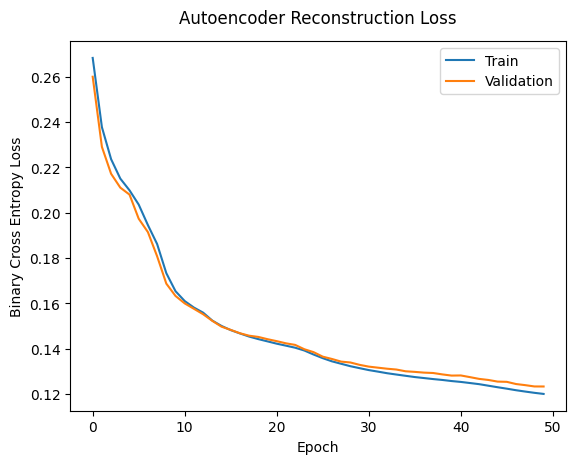

In [28]:
# Plot training and validation loss scores
# against the number of epochs.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

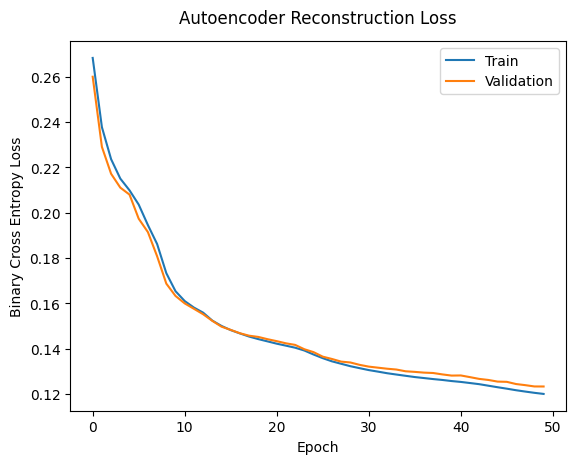

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

313/313 [==============================] - 1s 4ms/step


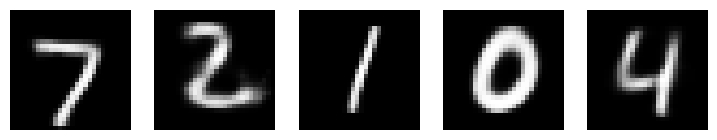

In [31]:
reconstructed_images = autoencoder.predict(test_images)
n = 5
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(reconstructed_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')
plt.show()

CNN BASED AUTOENCODER

In [33]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
input_img = Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
# at this point the representation is (7, 7, 32)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          9248

In [34]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [35]:
autoencoder.fit(x_train, x_train,
epochs=2,
batch_size=256,
shuffle=True,
validation_data=(x_test, x_test))

Epoch 1/2
235/235 [==============================] - 121s 510ms/step - loss: 0.1455 - val_loss: 0.0825
Epoch 2/2
235/235 [==============================] - 109s 462ms/step - loss: 0.0799 - val_loss: 0.0762


313/313 [==============================] - 4s 12ms/step


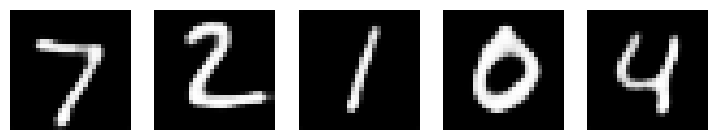

In [36]:
reconstructed_images = autoencoder.predict(x_test)
n = 5
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(reconstructed_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')
plt.show()

NOISE AUTOENCODER

In [37]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

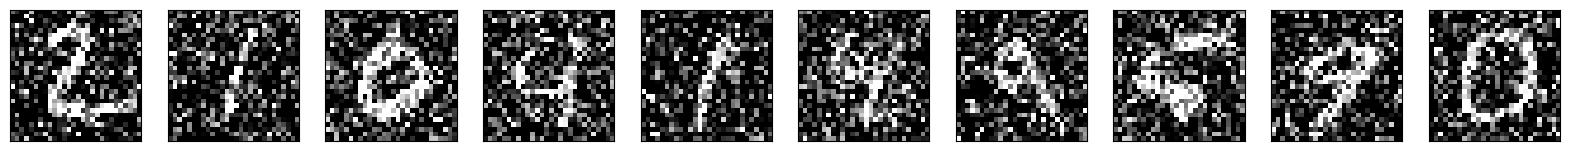

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n+1):
  ax = plt.subplot(1, n, i)
  plt.imshow(x_test_noisy[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [39]:
autoencoder.fit(x_train_noisy, x_train,

epochs=2,
batch_size=256,
shuffle=True,
validation_data=(x_test_noisy, x_test))

Epoch 1/2
235/235 [==============================] - 109s 464ms/step - loss: 0.1347 - val_loss: 0.1156
Epoch 2/2
235/235 [==============================] - 110s 468ms/step - loss: 0.1141 - val_loss: 0.1111


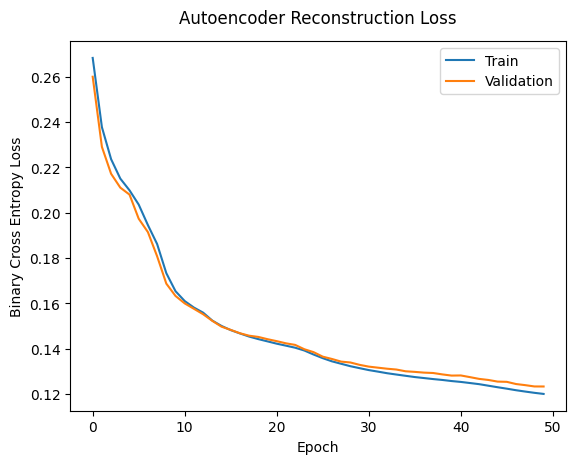

In [40]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

313/313 [==============================] - 5s 16ms/step


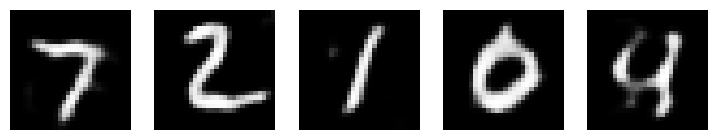

In [41]:
reconstructed_images = autoencoder.predict(x_test_noisy)
n = 5
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(reconstructed_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')
plt.show()

STACKED ENCODER

Epoch 1/10
235/235 [==============================] - 6s 24ms/step - loss: 0.1920 - val_loss: 0.1142
Epoch 2/10
235/235 [==============================] - 7s 29ms/step - loss: 0.1031 - val_loss: 0.0934
Epoch 3/10
235/235 [==============================] - 8s 34ms/step - loss: 0.0902 - val_loss: 0.0855
Epoch 4/10
235/235 [==============================] - 5s 22ms/step - loss: 0.0844 - val_loss: 0.0814
Epoch 5/10
235/235 [==============================] - 5s 20ms/step - loss: 0.0813 - val_loss: 0.0790
Epoch 6/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0790 - val_loss: 0.0776
Epoch 7/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0774 - val_loss: 0.0759
Epoch 8/10
235/235 [==============================] - 5s 20ms/step - loss: 0.0761 - val_loss: 0.0749
Epoch 9/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0750 - val_loss: 0.0740
Epoch 10/10
313/313 [==============================] - 1s 2ms/step


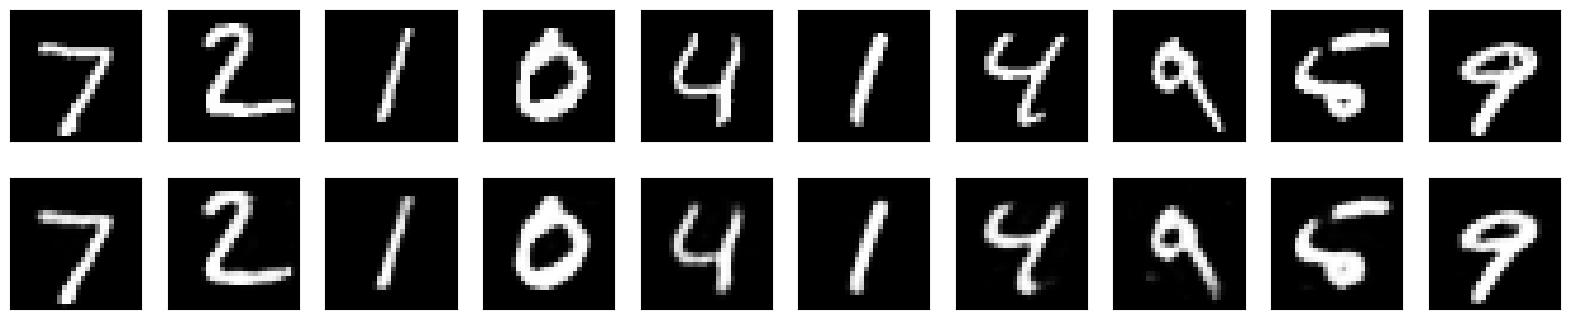

In [42]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and flatten the input data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

# Define the stacked encoder autoencoder architecture
model = Sequential()

# Encoder layers
model.add(Dense(units=256, activation='relu', input_shape=(784,)))
model.add(Dense(units=128, activation='relu'))

# Decoder layers
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=784, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
model.fit(x_train, x_train, epochs=10, batch_size=256, validation_data=(x_test, x_test))

# Generate reconstructed images
reconstructed_images = model.predict(x_test)

# Display original and reconstructed images
import matplotlib.pyplot as plt

n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
